In [139]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy import stats

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [143]:
N = 1000
tau = 3.052*60

def p_dec(x, k):
    return 1-2**(-x/k)

ts = np.arange(0, 3.052*60*10, 1) # time steps of 1 second
N_Tl = []
N_Pb = []

tl = np.ones(N) #initial number of Tl
pb = np.zeros(N) #Initial number of Pb
for t in ts:
    for i in range(N):
        if random.uniform(0, 1) < p_dec(1,tau): # for each time step and for each atom I generate a uniform random number and check if it is lower or higher thet the probability of decay
            tl[i] = 0
            pb[i] = 1
    
    N_Tl.append(np.sum(tl)) # I calculate the total number of atoms for each time step
    N_Pb.append(np.sum(pb))

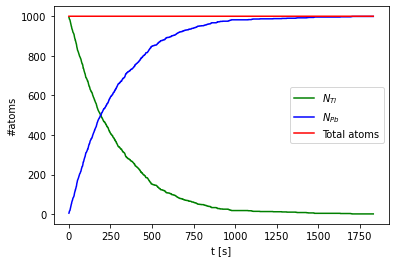

In [144]:
plt.plot(ts, N_Tl, label="$N_{Tl}$", color='green')
plt.plot(ts, N_Pb, label="$N_{Pb}$", color='blue')
plt.plot(ts, np.array(N_Pb)+np.array(N_Tl), label="Total atoms", color='red')
plt.xlabel('t [s]')
plt.ylabel('#atoms')
plt.legend()
plt.show()

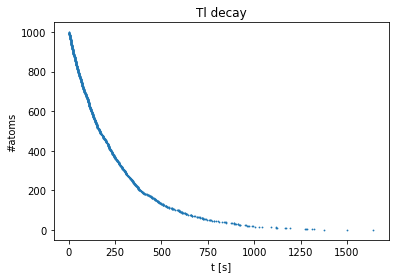

In [145]:
def p(x, k):
    2**(-x/k) * np.log(2) / k
    
def inverse_cdf(x, k):
    return - np.log(1-x) * k / np.log(2.0)

ts = np.zeros(N)

for i in range(N):
    p = random.uniform(0, 1)
    ts[i] = inverse_cdf(p,tau)
    
ts = np.sort(ts)

plt.plot(ts, range(999,-1,-1), 'o', markersize=0.8)
plt.xlabel('t [s]')
plt.ylabel('#atoms')
plt.title('Tl decay')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

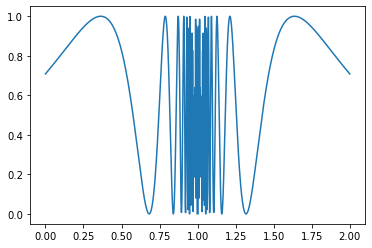

In [146]:
def f(x):
    return (np.sin(1. / (1-x)))**2

x=np.linspace(0.0, 2.0, 1000)
plt.plot(x, f(x), '-')

In [147]:
# Hit-miss method
m = 100
I_hm = np.zeros(m)

for k in range(m):
    N = 100000
    count = 0
    for j in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I_hm[k] = 2 * count / N
    
print("Integral:", np.mean(I_hm), '+-', np.sqrt(np.var(I_hm)/m))

Integral: 1.3471482000000004 +- 0.00024548663425938194


In [148]:
# Mean value method
I_mv = np.zeros(m)

for k in range(m):
    n = 1000000
    x = 2 * np.random.random(n) # x is random uniform between 0 and 2
    f_mean = np.sum(f(x))/n # computation of the function mean with uniformly distributed random points
    I_mv[k] = 2*f_mean

print("Integral:", np.mean(I_mv), '+-', np.sqrt(np.var(I_mv)/m))

Integral: 1.347014661383025 +- 7.120827596363758e-05


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [149]:
# Area for a circle of unit radius using the hit-miss method

m = 1000000
x = np.random.uniform(-1.0, 1.0, size=m)     # x is random uniform between 0 and 1
y = np.random.uniform(-1.0, 1.0, size=m)     # y is random uniform between 0 and 1
r2 = x**2 + y**2

counts = 0
for j in range(m):
    if r2[j]<=1:
        counts += 1

I = 2*2*counts/m

print('Integral of the 2D sphere:', I)

Integral of the 2D sphere: 3.143624


In [150]:
# Generalization for a nD sphere
dim = 10
m = 10000000

# p is the number of points rabdomly generated, n is the number of dimensions 
def nd_sphere(p, n): 
    xn = np.random.uniform(-1.0, 1.0, size=(p,dim))
    r2_n = (xn**2).sum(axis=1)
    
    count = 0
    for j in range(p):
        if r2_n[j]<=1:
            count += 1

    I_n = (2**dim)*count/p
    return I_n

print('Integral of the', dim, 'dimensions sphere:', nd_sphere(m, dim))
    

Integral of the 10 dimensions sphere: 2.5370624


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

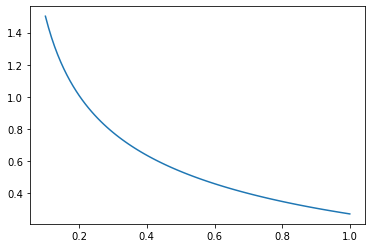

In [151]:
def f(t):
    return t**(-1/2)/(np.exp(t) + 1)

x=np.linspace(0.1, 1.0, 100)
plt.plot(x, f(x), '-')

In [152]:
def w(t):              
    return 1/np.sqrt(t)

# I need to generate point according to the distribution of w(x). I use the inverse transform method
def w_dist(t):
    return t**2 / 4.0

n = 10000000
a = 0
b = 1

p = np.random.random(n) # uniform random points
x =  w_dist(p) # points distributed according to w(x)

Iw = 2.0 * (np.sqrt(b) - np.sqrt(a)) # integral of w(x) between 0 and 1
If = Iw *  np.mean(f(x) / w(x))

print(If)

0.9584374159377694
